In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('health_train.csv')

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [4]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0
381108,381109,Male,46,1,29,0,1-2 Year,No,41777,26,237,0


In [5]:
df = df.drop('id', axis = 1)

In [6]:
df.shape

(381109, 11)

In [7]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [8]:
df.duplicated().sum()

269

In [9]:
df = df.drop_duplicates()

In [10]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380840 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Gender                380840 non-null  object
 1   Age                   380840 non-null  int64 
 2   Driving_License       380840 non-null  int64 
 3   Region_Code           380840 non-null  int64 
 4   Previously_Insured    380840 non-null  int64 
 5   Vehicle_Age           380840 non-null  object
 6   Vehicle_Damage        380840 non-null  object
 7   Annual_Premium        380840 non-null  int64 
 8   Policy_Sales_Channel  380840 non-null  int64 
 9   Vintage               380840 non-null  int64 
 10  Response              380840 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 34.9+ MB


In [12]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000
mean,38.823593,0.997868,26.388307,0.458208,30584.016078,112.030225,154.344607,0.122584
std,15.513206,0.046126,13.229907,0.498251,17203.258664,54.206194,83.670240,0.327960
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24426.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31678.500000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [13]:
df.nunique()

Gender                      2
Age                        66
Driving_License             2
Region_Code                53
Previously_Insured          2
Vehicle_Age                 3
Vehicle_Damage              2
Annual_Premium          48838
Policy_Sales_Channel      155
Vintage                   290
Response                    2
dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df['Gender'].value_counts()

Male      205938
Female    174902
Name: Gender, dtype: int64

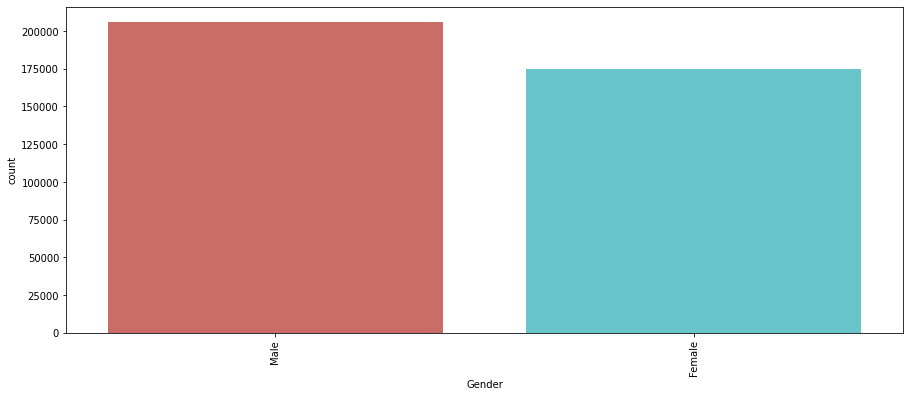

In [18]:
plt.figure(figsize=(15,6))
sns.countplot('Gender', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

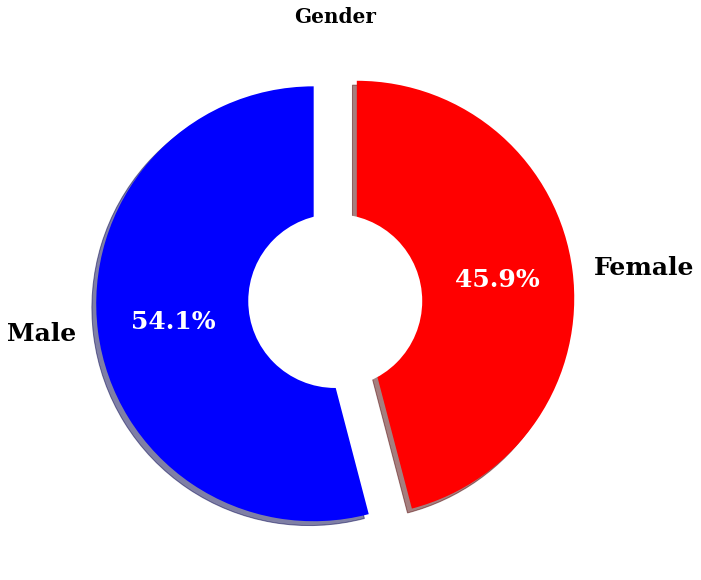

In [19]:
label_data = df['Gender'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Gender', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [20]:
df['Age'].unique()

array([44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 37, 25, 42, 60, 65, 49,
       34, 51, 26, 57, 79, 48, 45, 72, 30, 54, 27, 38, 22, 78, 20, 39, 62,
       58, 59, 63, 50, 67, 77, 28, 69, 52, 31, 33, 43, 36, 53, 70, 46, 55,
       40, 61, 75, 64, 35, 66, 68, 74, 73, 84, 83, 81, 80, 82, 85],
      dtype=int64)

In [21]:
df['Age'].value_counts()

24    25939
23    24239
22    20956
25    20620
21    16452
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64

In [22]:
df['Driving_License'].unique()

array([1, 0], dtype=int64)

In [23]:
df['Driving_License'].value_counts()

1    380028
0       812
Name: Driving_License, dtype: int64

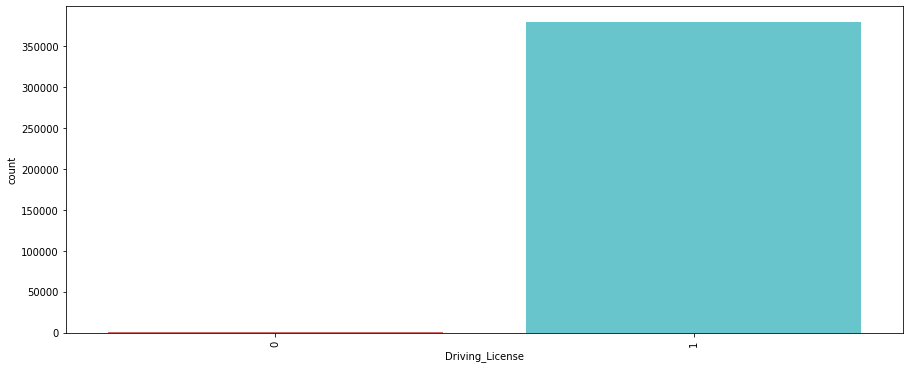

In [24]:
plt.figure(figsize=(15,6))
sns.countplot('Driving_License', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

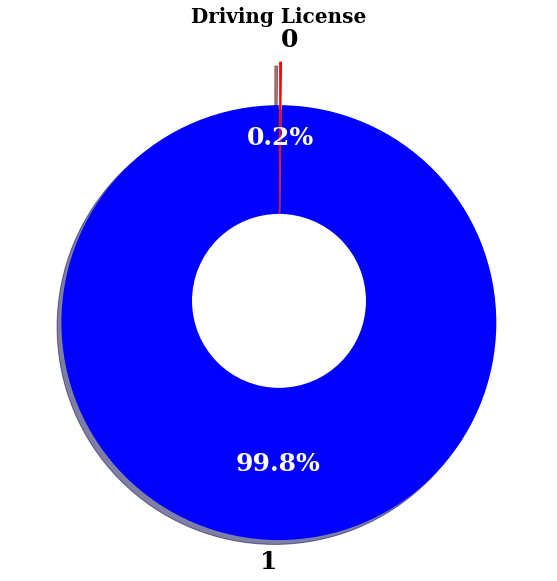

In [25]:
label_data = df['Driving_License'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Driving License', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [26]:
df['Region_Code'].unique()

array([28,  3, 11, 41, 33,  6, 35, 50, 15, 45,  8, 36, 30, 26, 16, 47, 48,
       19, 39, 23, 37,  5, 17,  2,  7, 29, 46, 27, 25, 13, 18, 20, 49, 22,
       44,  0,  9, 31, 12, 34, 21, 10, 14, 38, 24, 40, 43, 32,  4, 51, 42,
        1, 52], dtype=int64)

In [27]:
df['Region_Code'].value_counts()

28    106335
8      33857
46     19747
41     18256
15     13300
30     12177
29     11052
50     10237
3       9245
11      9229
36      8788
33      7647
47      7434
35      6939
6       6277
45      5603
37      5501
18      5150
14      4677
48      4654
39      4642
10      4372
21      4266
2       4037
13      4034
7       3275
12      3197
9       3101
27      2819
32      2784
43      2639
17      2616
26      2587
25      2502
24      2415
38      2026
0       2015
16      2005
23      1959
31      1948
20      1931
49      1831
4       1798
34      1663
19      1535
22      1309
40      1295
5       1279
1       1006
44       808
42       591
52       267
51       183
Name: Region_Code, dtype: int64

In [28]:
df['Previously_Insured'].unique()

array([0, 1], dtype=int64)

In [29]:
df['Previously_Insured'].value_counts()

0    206336
1    174504
Name: Previously_Insured, dtype: int64

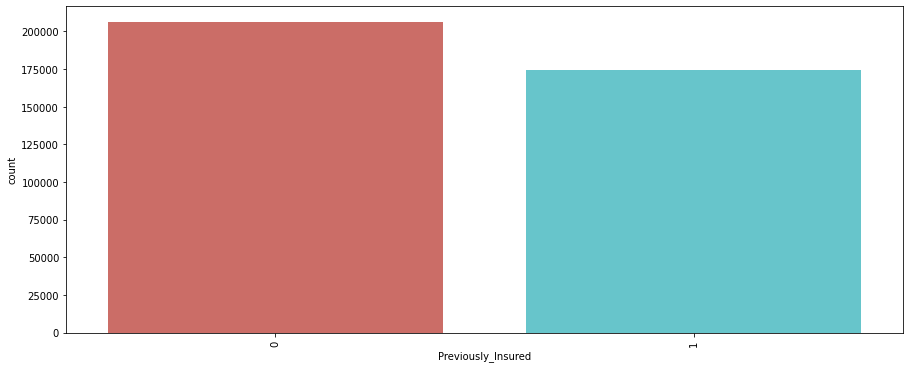

In [30]:
plt.figure(figsize=(15,6))
sns.countplot('Previously_Insured', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

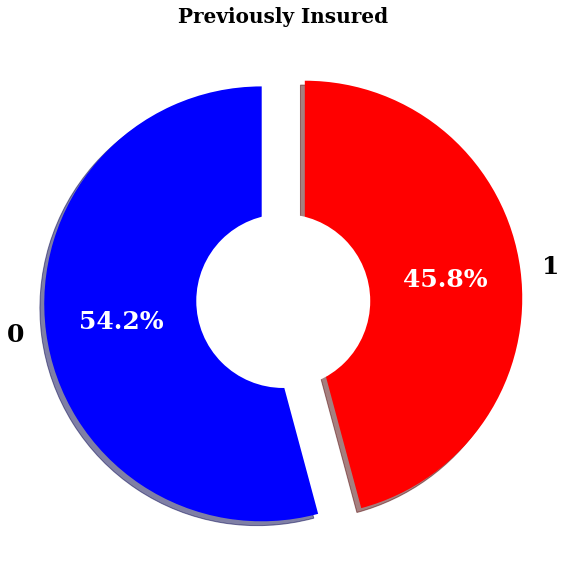

In [31]:
label_data = df['Previously_Insured'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Previously Insured', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [32]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [33]:
df['Vehicle_Age'].value_counts()

1-2 Year     200167
< 1 Year     164671
> 2 Years     16002
Name: Vehicle_Age, dtype: int64

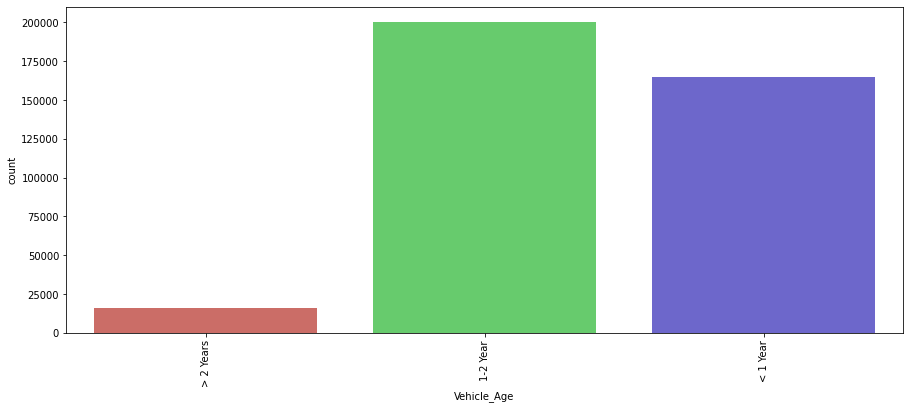

In [34]:
plt.figure(figsize=(15,6))
sns.countplot('Vehicle_Age', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

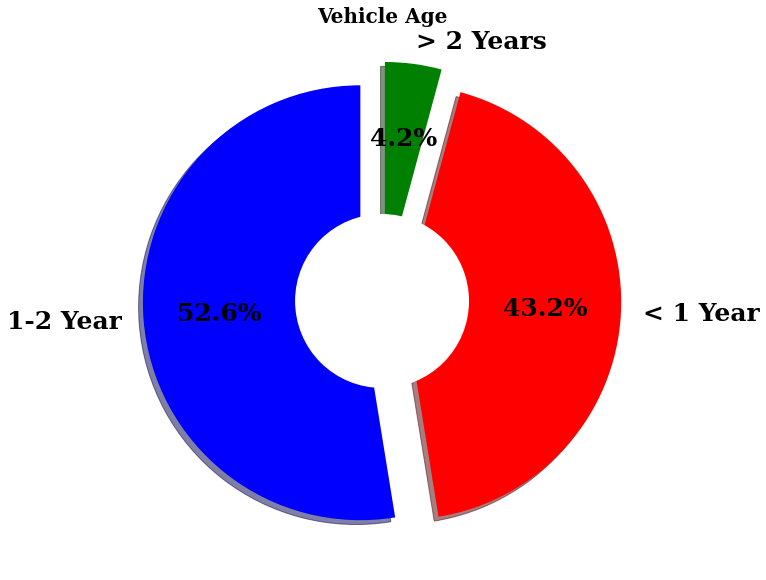

In [35]:
label_data = df['Vehicle_Age'].value_counts()

explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Vehicle Age', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [36]:
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [37]:
df['Vehicle_Damage'].value_counts()

Yes    192277
No     188563
Name: Vehicle_Damage, dtype: int64

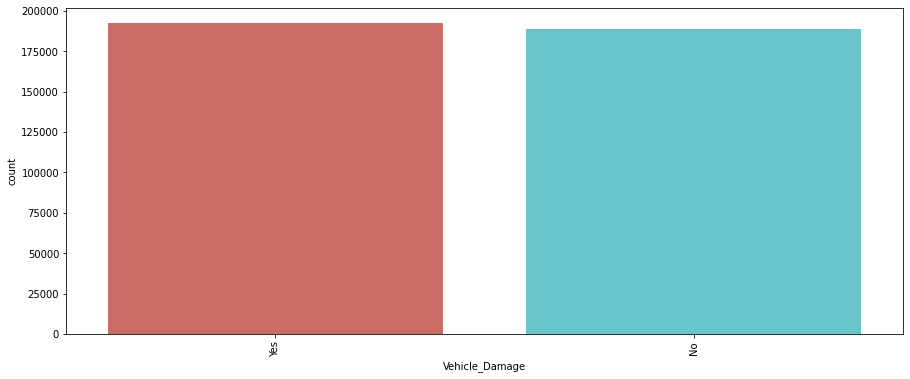

In [38]:
plt.figure(figsize=(15,6))
sns.countplot('Vehicle_Damage', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

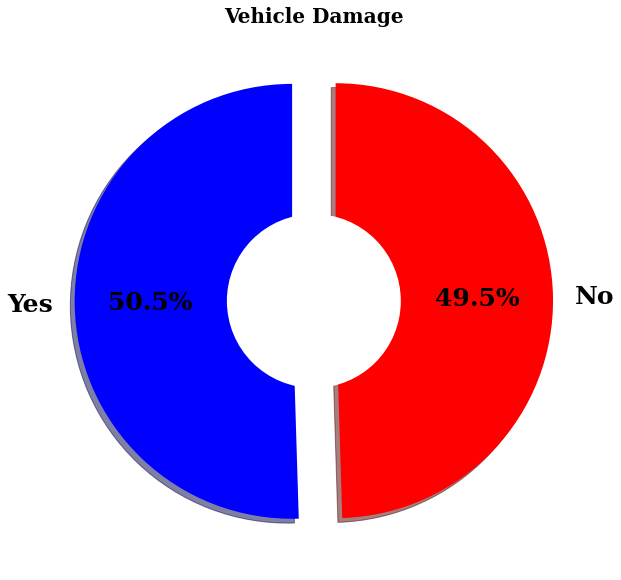

In [39]:
label_data = df['Vehicle_Damage'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Vehicle Damage', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [40]:
df['Response'].unique()

array([1, 0], dtype=int64)

In [41]:
df['Response'].value_counts()

0    334155
1     46685
Name: Response, dtype: int64

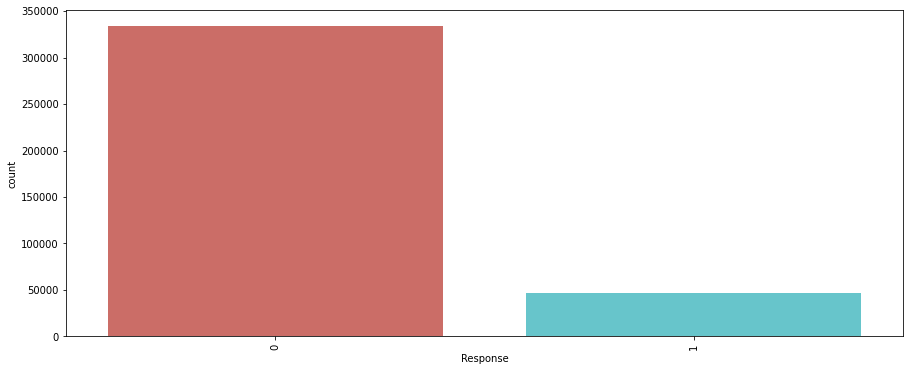

In [42]:
plt.figure(figsize=(15,6))
sns.countplot('Response', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

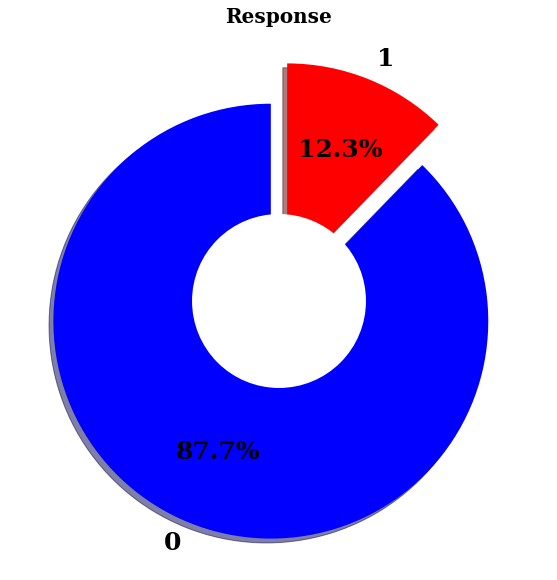

In [43]:
label_data = df['Response'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Response', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [1]:
plt.figure(figsize=(15,6))
sns.histplot(df['Age'], bins = 20, kde = True, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

NameError: name 'plt' is not defined

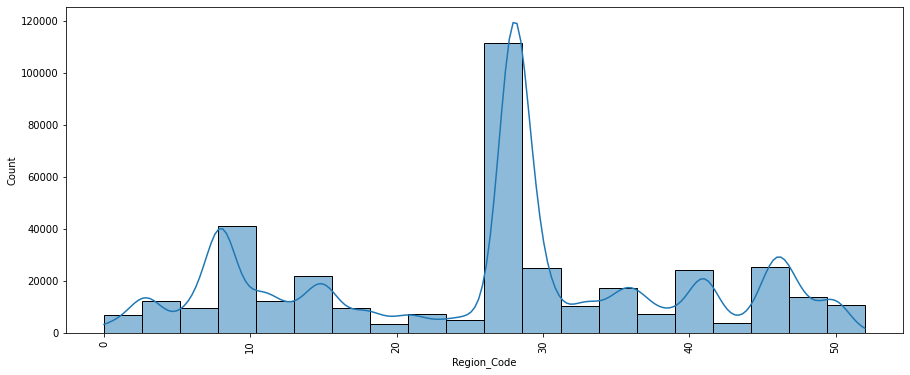

In [45]:
plt.figure(figsize=(15,6))
sns.histplot(df['Region_Code'], bins = 20, kde = True, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

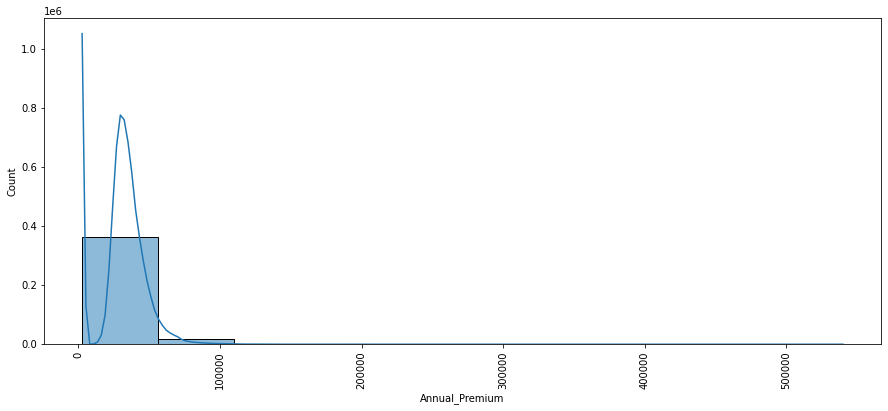

In [46]:
plt.figure(figsize=(15,6))
sns.histplot(df['Annual_Premium'], bins = 10, kde = True, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

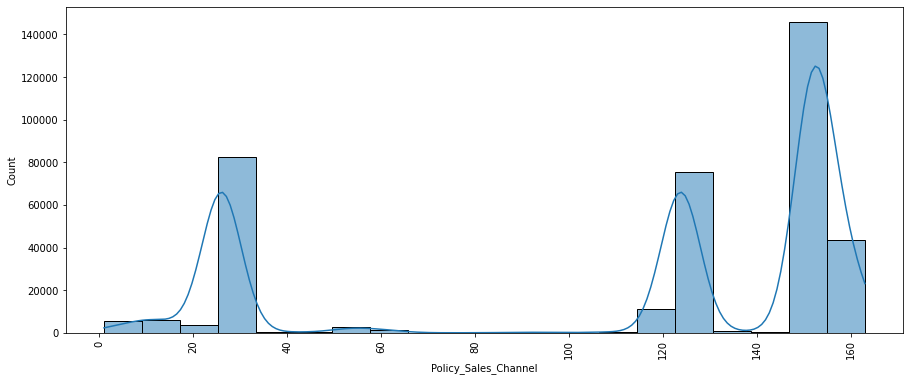

In [47]:
plt.figure(figsize=(15,6))
sns.histplot(df['Policy_Sales_Channel'], bins = 20, kde = True, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

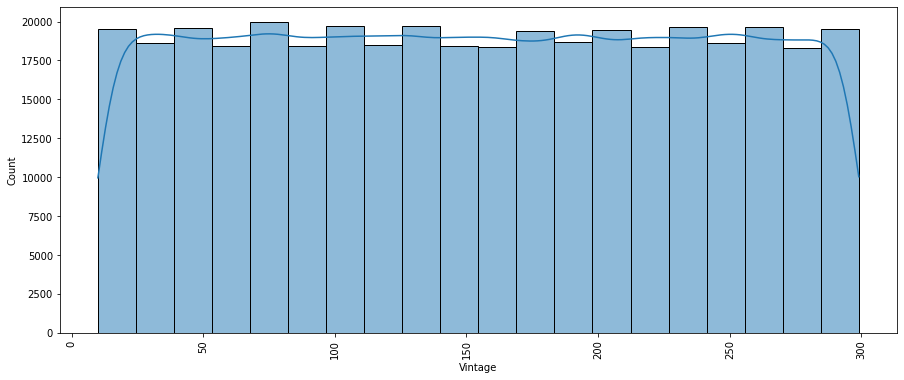

In [48]:
plt.figure(figsize=(15,6))
sns.histplot(df['Vintage'], bins = 20, kde = True, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

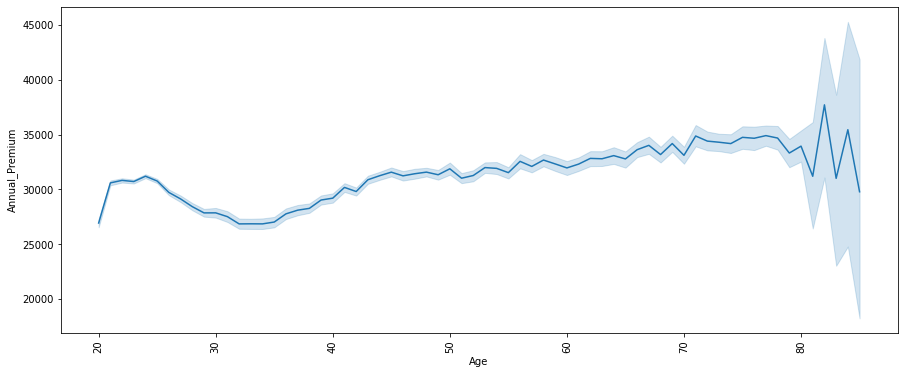

In [49]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['Age'], y = df['Annual_Premium'], data = df, 
             palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

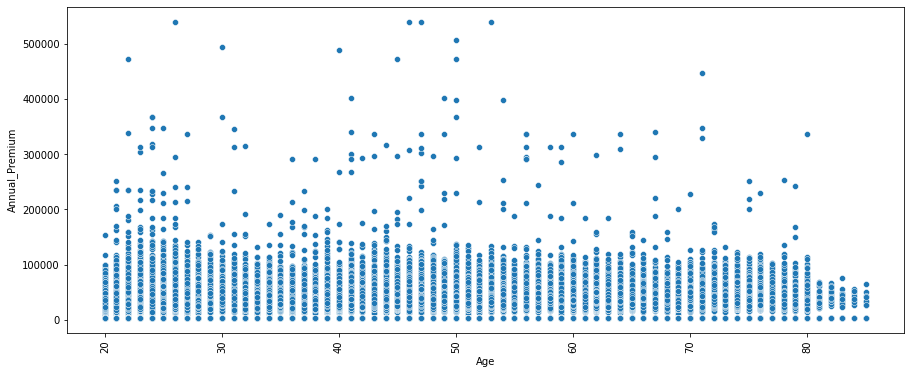

In [50]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['Age'], y = df['Annual_Premium'], data = df, 
             palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

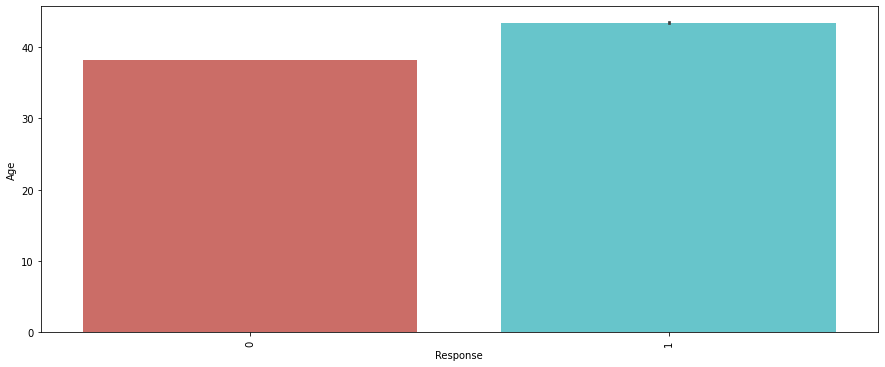

In [51]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Response', y = 'Age', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

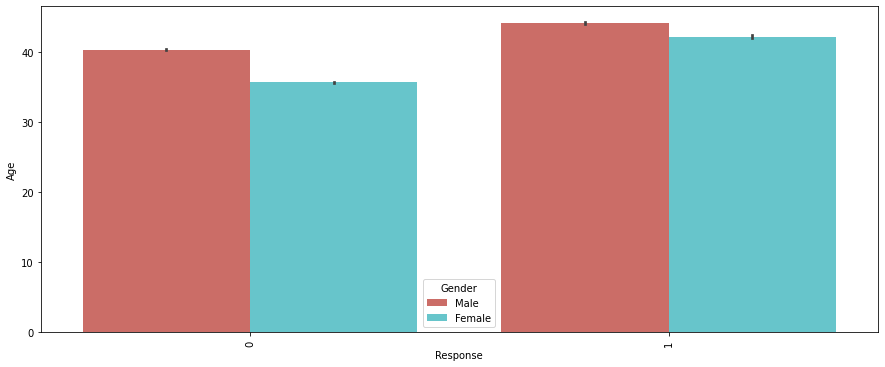

In [52]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Response', y = 'Age', hue = 'Gender', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

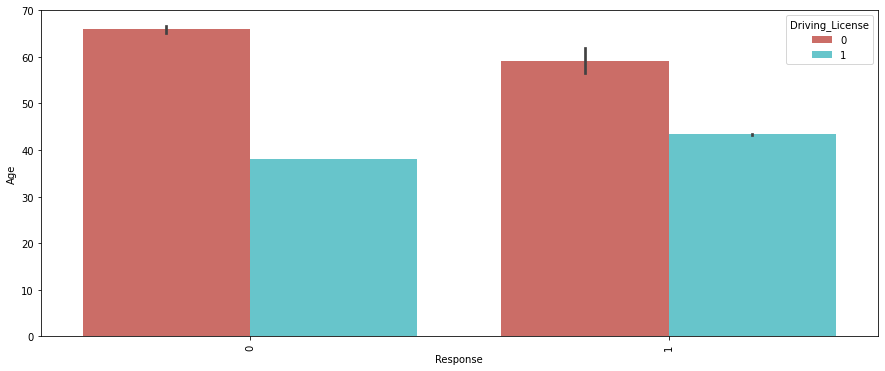

In [53]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Response', y = 'Age', hue = 'Driving_License', data = df, 
            palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

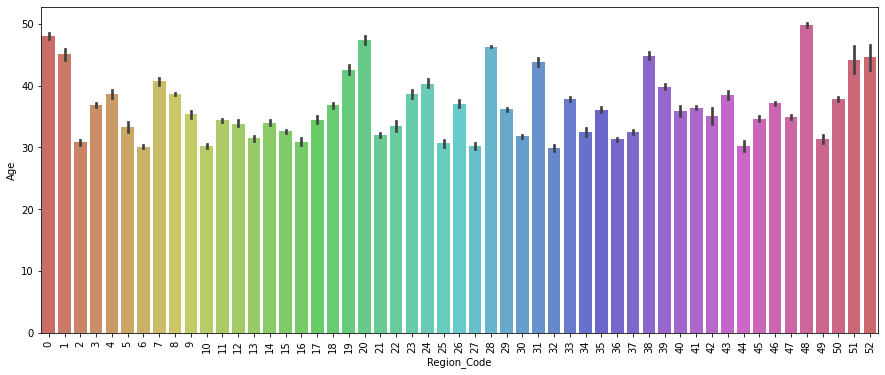

In [54]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Region_Code', y = 'Age', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

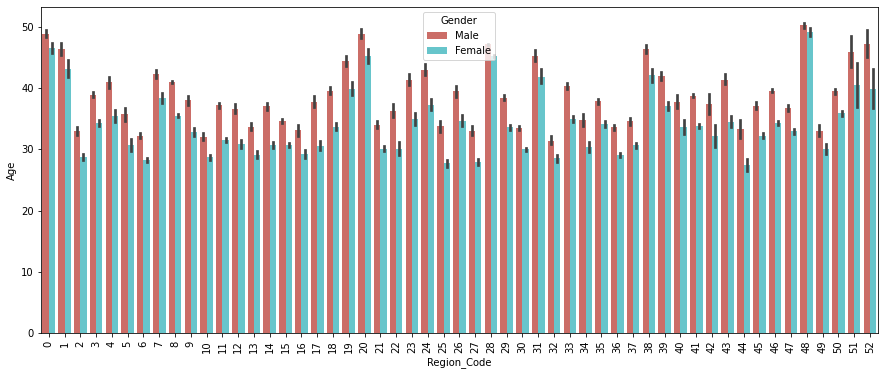

In [55]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Region_Code', y = 'Age', hue = 'Gender', data = df, 
            palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

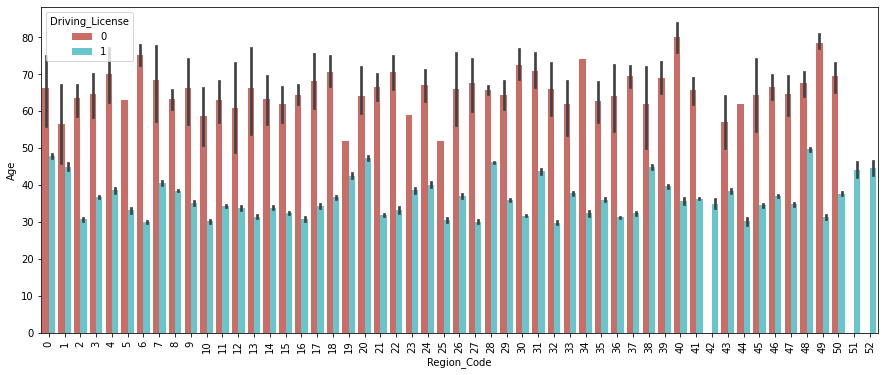

In [56]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Region_Code', y = 'Age', hue = 'Driving_License', data = df, 
            palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

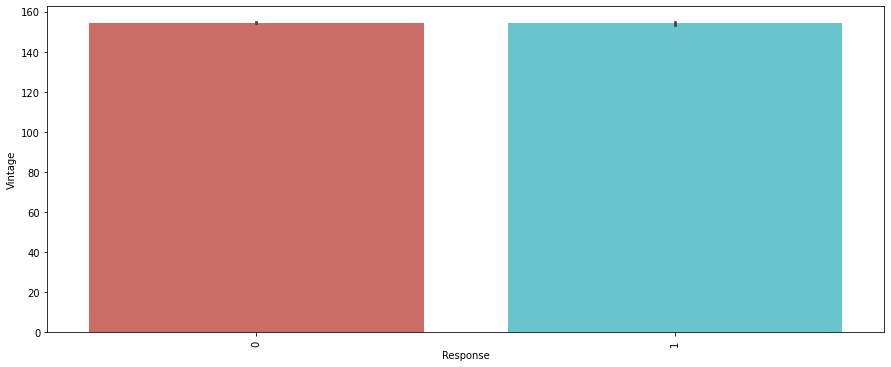

In [57]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Response', y = 'Vintage', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

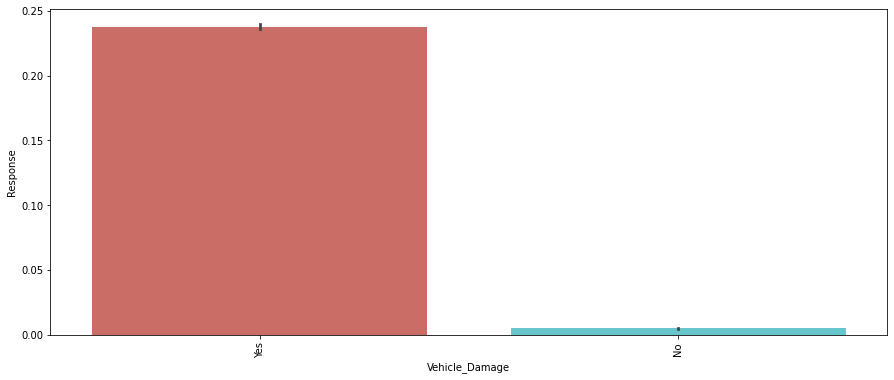

In [58]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'Response', x = 'Vehicle_Damage', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

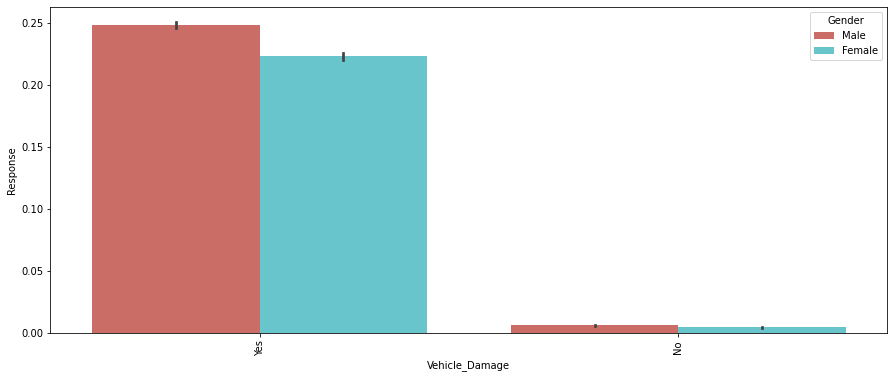

In [59]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'Response', x = 'Vehicle_Damage', hue = 'Gender', 
            data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

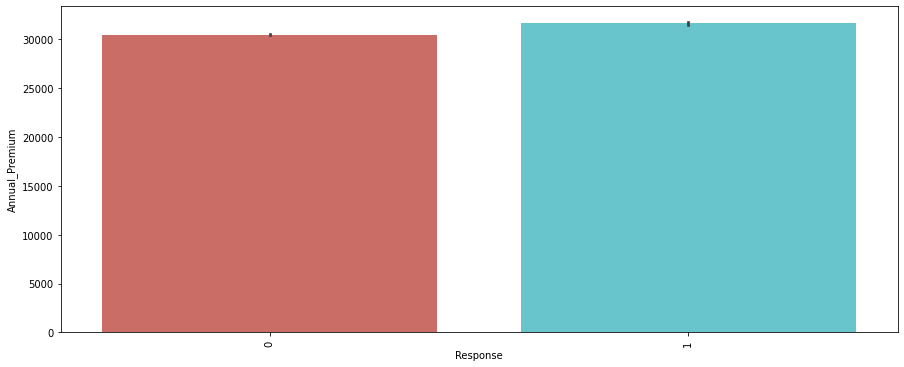

In [60]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Response', y = 'Annual_Premium', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

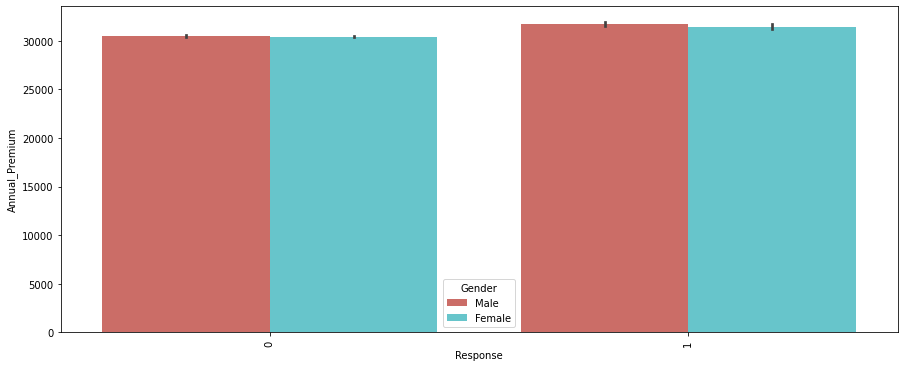

In [61]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Response', y = 'Annual_Premium', hue = 'Gender' ,
            data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

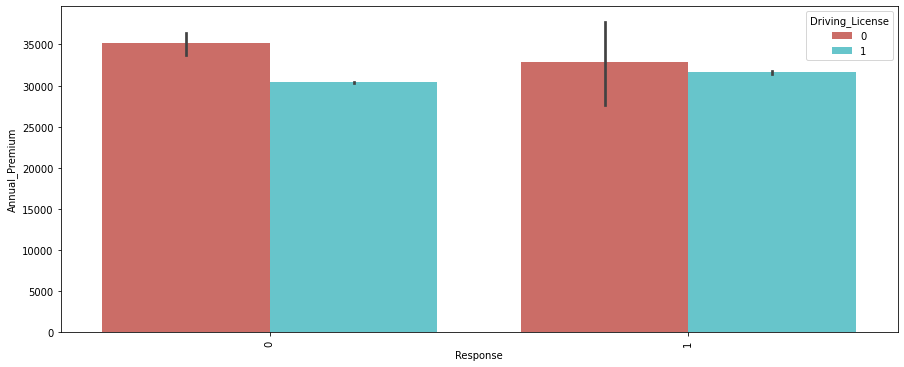

In [62]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Response', y = 'Annual_Premium', hue = 'Driving_License' ,
            data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

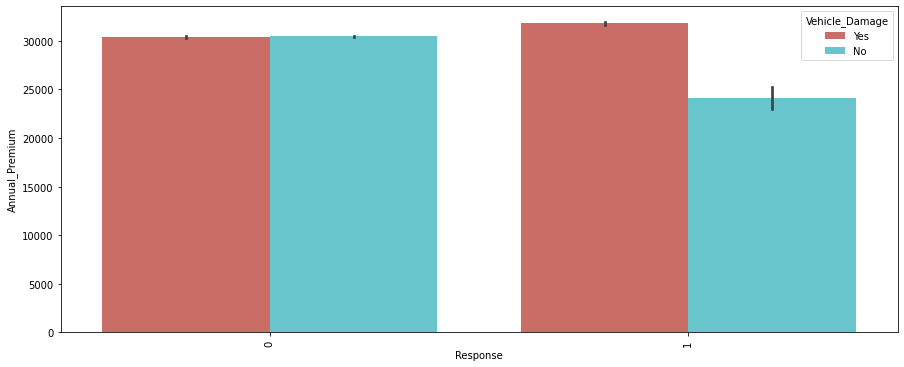

In [63]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Response', y = 'Annual_Premium', hue = 'Vehicle_Damage' ,
            data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

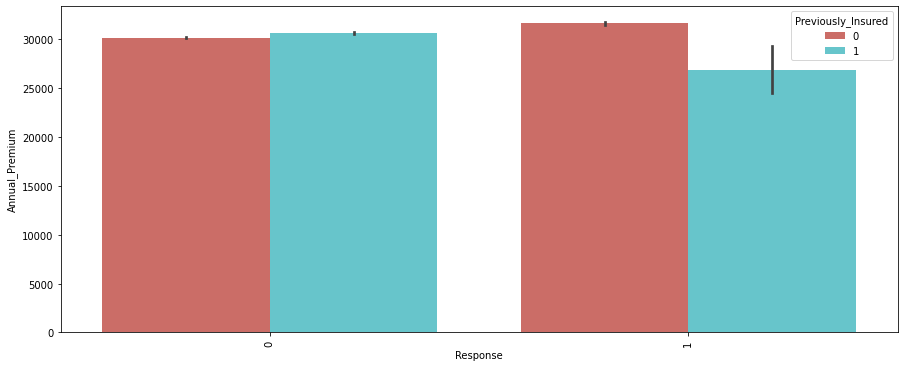

In [64]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Response', y = 'Annual_Premium', hue = 'Previously_Insured' ,
            data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

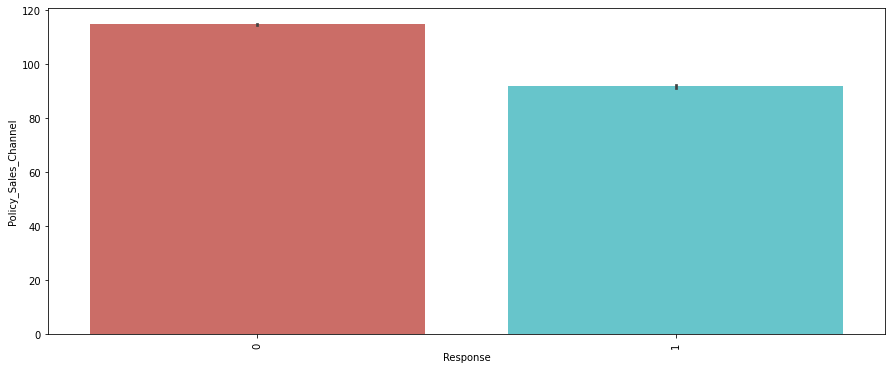

In [65]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Response', y = 'Policy_Sales_Channel',
            data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

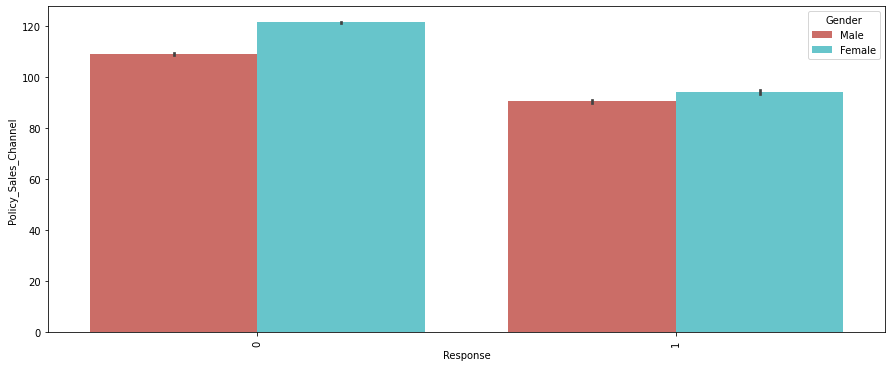

In [66]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Response', y = 'Policy_Sales_Channel', hue = 'Gender',
            data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

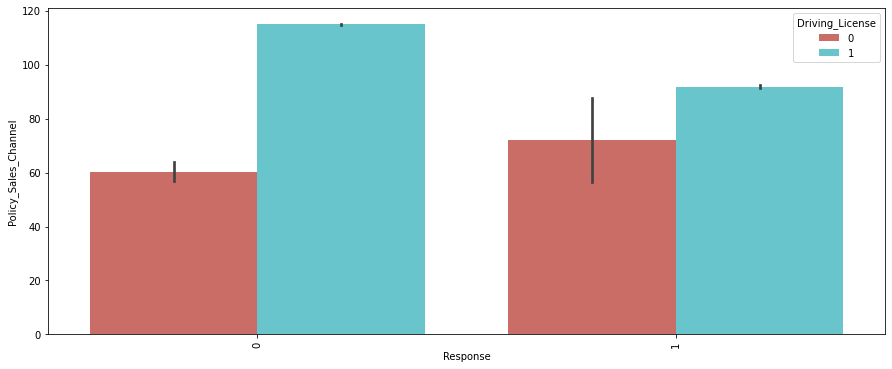

In [67]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Response', y = 'Policy_Sales_Channel', hue = 'Driving_License',
            data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

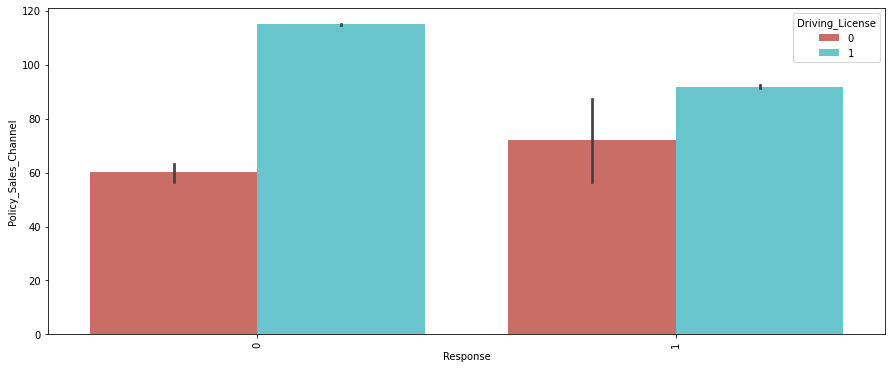

In [68]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Response', y = 'Policy_Sales_Channel', hue = 'Driving_License',
            data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

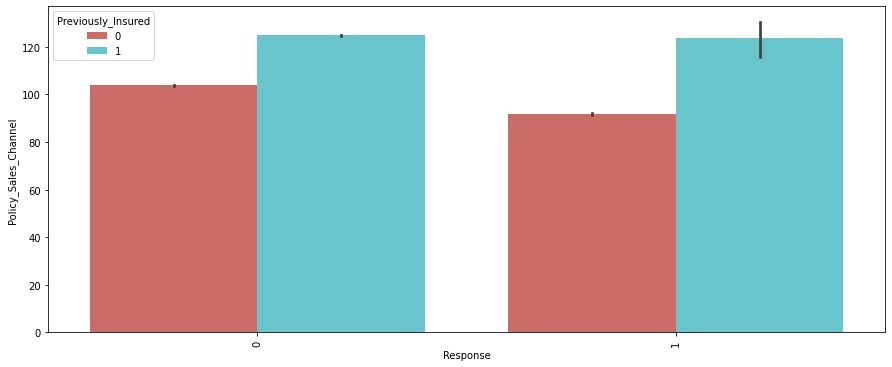

In [69]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Response', y = 'Policy_Sales_Channel', hue = 'Previously_Insured',
            data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

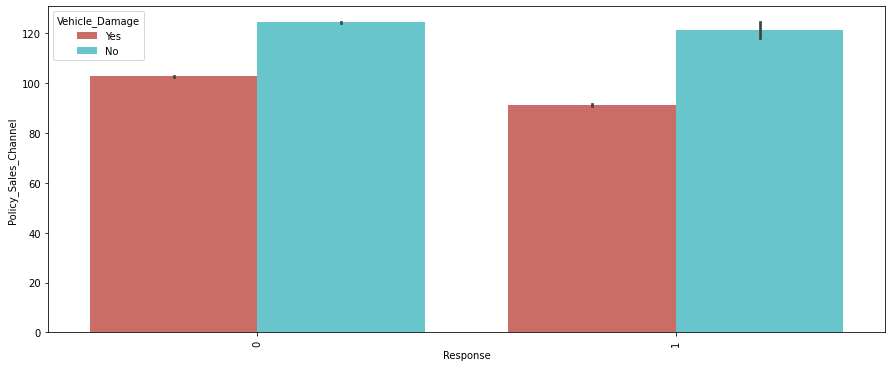

In [70]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Response', y = 'Policy_Sales_Channel', hue = 'Vehicle_Damage',
            data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [71]:
df_corr = df.corr()

In [72]:
df_corr

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.079799,0.042545,-0.254666,0.067478,-0.577798,-0.001278,0.111098
Driving_License,-0.079799,1.000000,-0.001083,0.014975,-0.011865,0.043741,-0.000850,0.010161
Region_Code,0.042545,-0.001083,1.000000,-0.024652,-0.010540,-0.042378,-0.002737,0.010584
Previously_Insured,-0.254666,0.014975,-0.024652,1.000000,0.004286,0.219382,0.002623,-0.341201
Annual_Premium,0.067478,-0.011865,-0.010540,0.004286,1.000000,-0.113256,-0.000547,0.022482
Policy_Sales_Channel,-0.577798,0.043741,-0.042378,0.219382,-0.113256,1.000000,0.000046,-0.139010
Vintage,-0.001278,-0.000850,-0.002737,0.002623,-0.000547,0.000046,1.000000,-0.001036
Response,0.111098,0.010161,0.010584,-0.341201,0.022482,-0.139010,-0.001036,1.000000


In [73]:
import numpy as np

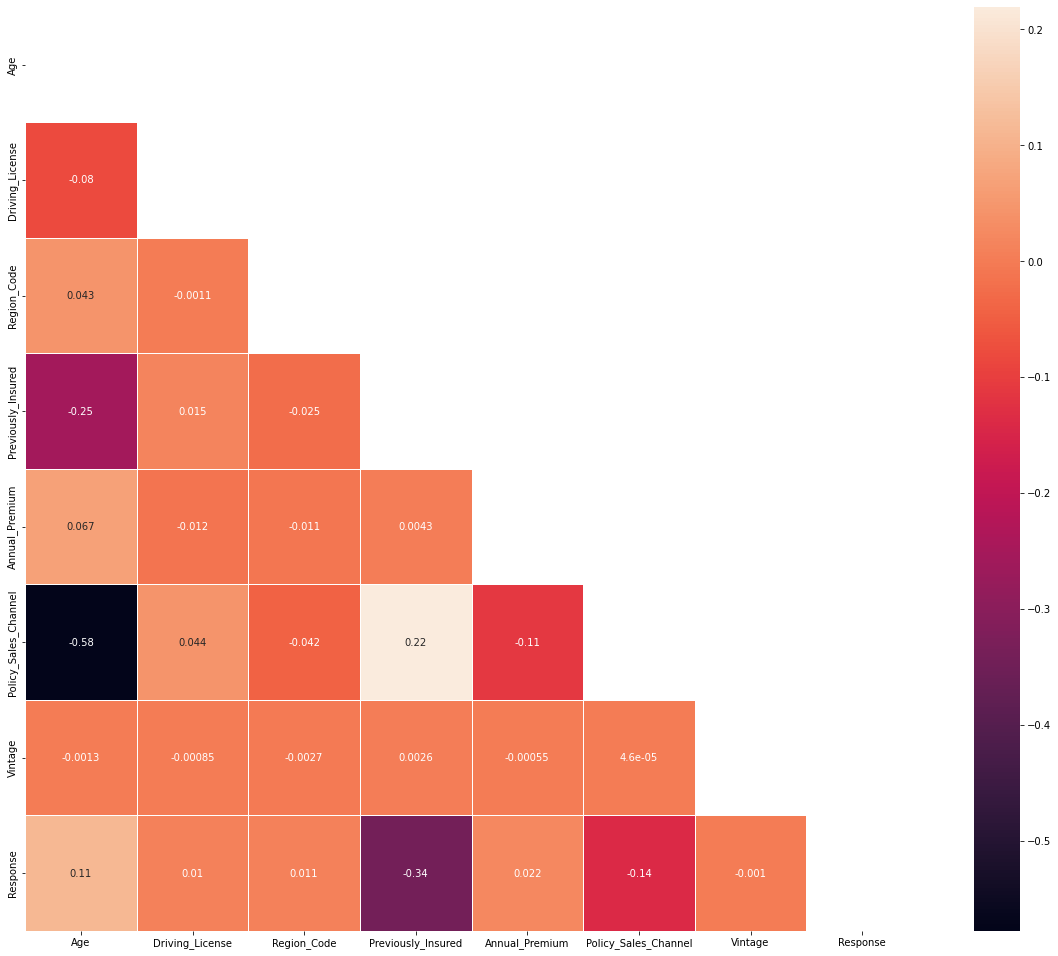

In [74]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()

In [75]:
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})

In [76]:
df['Vehicle_Damage'].replace({'Yes':1,'No':0}, inplace=True)
df['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)

In [77]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28,0,3,1,40454,26,217,1
1,1,76,1,3,0,2,0,33536,26,183,0
2,1,47,1,28,0,3,1,38294,26,27,1
3,1,21,1,11,1,1,0,28619,152,203,0
4,0,29,1,41,1,1,0,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26,1,2,0,30170,26,88,0
381105,1,30,1,37,1,1,0,40016,152,131,0
381106,1,21,1,30,1,1,0,35118,160,161,0
381107,0,68,1,14,0,3,1,44617,124,74,0


Boxplot for: Gender


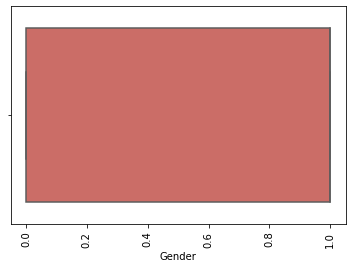

Boxplot for: Age


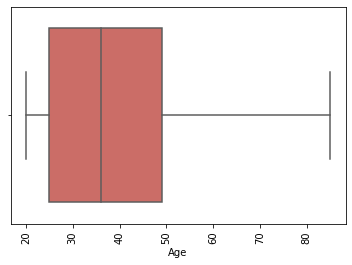

Boxplot for: Driving_License


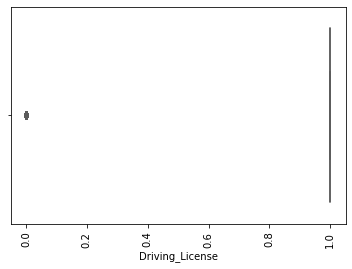

Boxplot for: Region_Code


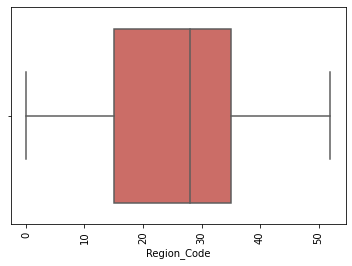

Boxplot for: Previously_Insured


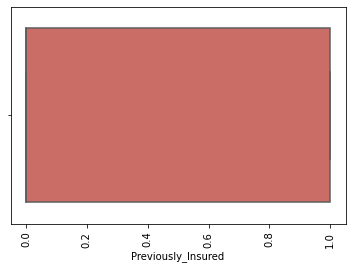

Boxplot for: Vehicle_Age


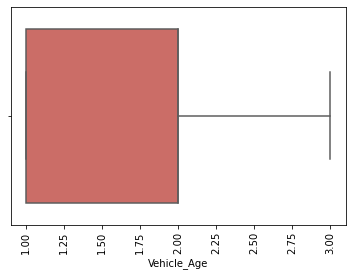

Boxplot for: Vehicle_Damage


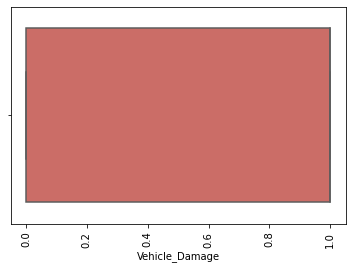

Boxplot for: Annual_Premium


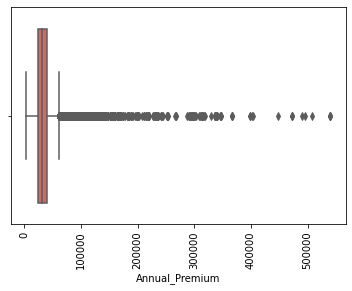

Boxplot for: Policy_Sales_Channel


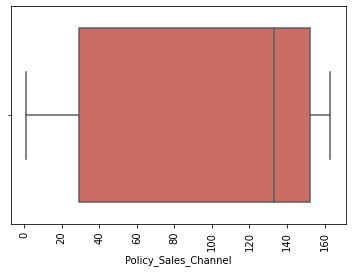

Boxplot for: Vintage


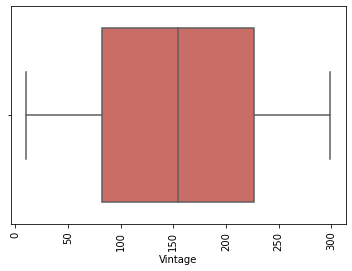

Boxplot for: Response


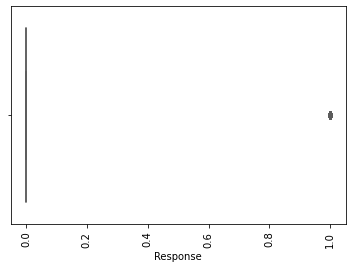

In [78]:
for i in df.columns:
    print('Boxplot for:', i)
    sns.boxplot(df[i], palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

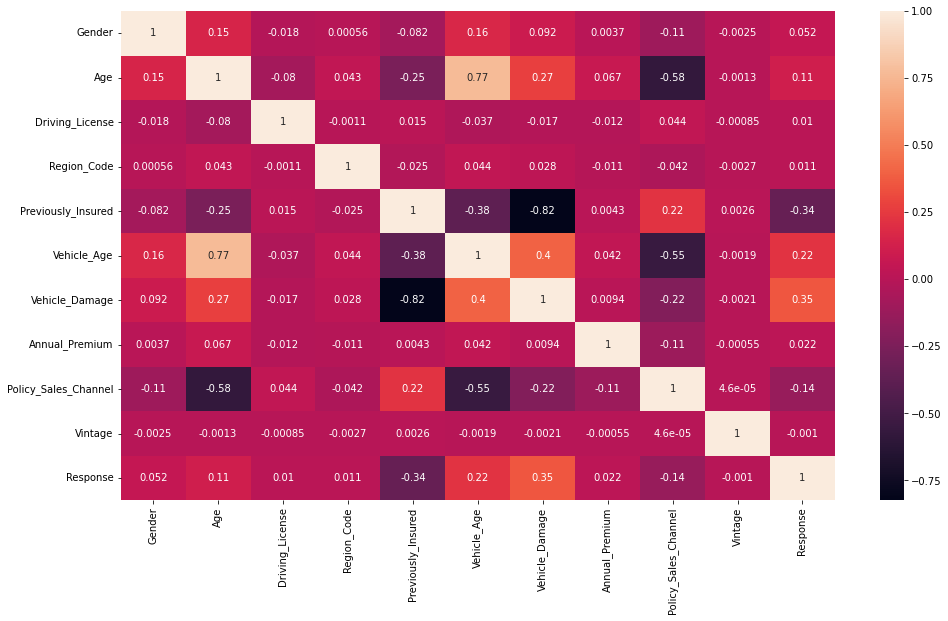

In [79]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True);
plt.show()

In [80]:
hig_corr = df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Response"]) >= 0.2]
hig_corr_features

Index(['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response'], dtype='object')

In [81]:
numeric_cols=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[numeric_cols])
df[numeric_cols]=scaler.transform(df[numeric_cols])
df[numeric_cols]=scaler.transform(df[numeric_cols])

In [83]:
df.describe().loc[['min', 'max']]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
min,0.0,-0.307692,0.0,0.000000,0.0,1.0,0.0,-0.004893,-0.006173,-0.034602,0.0
max,1.0,-0.292308,1.0,0.019231,1.0,3.0,1.0,-0.004891,0.000000,-0.031142,1.0


In [84]:
X = df.drop('Response', axis = 1)
y = df['Response']

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [87]:
X

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,-0.302012,1,0.010355,0,3,1,-0.004893,-0.005220,-0.032124
1,1,-0.294438,1,0.001109,0,2,0,-0.004893,-0.005220,-0.032531
2,1,-0.301302,1,0.010355,0,3,1,-0.004893,-0.005220,-0.034399
3,1,-0.307456,1,0.004068,1,1,0,-0.004893,-0.000419,-0.032291
4,0,-0.305562,1,0.015163,1,1,0,-0.004893,-0.000419,-0.034255
...,...,...,...,...,...,...,...,...,...,...
668305,1,-0.302012,1,0.002420,0,2,1,-0.004893,-0.005220,-0.033676
668306,1,-0.307139,1,0.002219,0,1,1,-0.004893,-0.000419,-0.033820
668307,1,-0.299701,1,0.005547,0,2,1,-0.004893,-0.001553,-0.034240
668308,1,-0.293876,1,0.010355,0,3,1,-0.004893,-0.001562,-0.032307


In [88]:
X.shape

(668310, 10)

In [89]:
y

0         1
1         0
2         1
3         0
4         0
         ..
668305    1
668306    1
668307    1
668308    1
668309    1
Name: Response, Length: 668310, dtype: int64

In [90]:
y.shape

(668310,)

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   random_state=42)

In [92]:
X_train.shape

(534648, 10)

In [93]:
y_train.shape

(534648,)

In [94]:
X_test.shape

(133662, 10)

In [95]:
y_test.shape

(133662,)

In [96]:
from sklearn.linear_model import LogisticRegression  
log_r= LogisticRegression()  
log_r.fit(X_train, y_train)

LogisticRegression()

In [97]:
y_pred_lr= log_r.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(y_test, y_pred_lr)

0.7848977271026919

In [100]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred_lr)

In [101]:
cm

array([[39559, 27187],
       [ 1564, 65352]], dtype=int64)

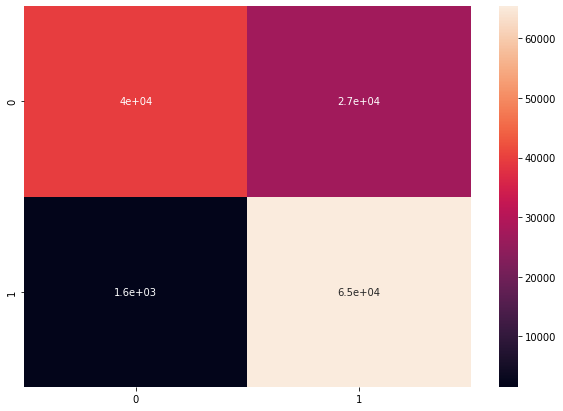

In [102]:
plt.figure(figsize=[10,7],)
sns.heatmap(cm, annot = True)
plt.show()

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     66746
           1       0.71      0.98      0.82     66916

    accuracy                           0.78    133662
   macro avg       0.83      0.78      0.78    133662
weighted avg       0.83      0.78      0.78    133662



In [104]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [105]:
y_pred_dt= dt.predict(X_test)

In [106]:
accuracy_score(y_test, y_pred_dt)

0.8723571396507609

In [107]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred_dt)

In [108]:
cm

array([[58130,  8616],
       [ 8445, 58471]], dtype=int64)

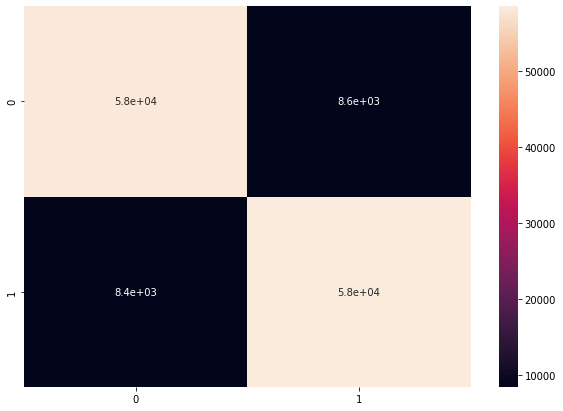

In [109]:
plt.figure(figsize=[10,7],)
sns.heatmap(cm, annot = True)
plt.show()

In [110]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     66746
           1       0.87      0.87      0.87     66916

    accuracy                           0.87    133662
   macro avg       0.87      0.87      0.87    133662
weighted avg       0.87      0.87      0.87    133662



In [111]:
from sklearn.ensemble import RandomForestClassifier  
rf_c = RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rf_c.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [112]:
y_pred_rf_c= rf_c.predict(X_test) 

In [113]:
accuracy_score(y_test, y_pred_rf_c)

0.8573790606155826

In [114]:
cm= confusion_matrix(y_test, y_pred_rf_c) 

In [115]:
cm

array([[51532, 15214],
       [ 3849, 63067]], dtype=int64)

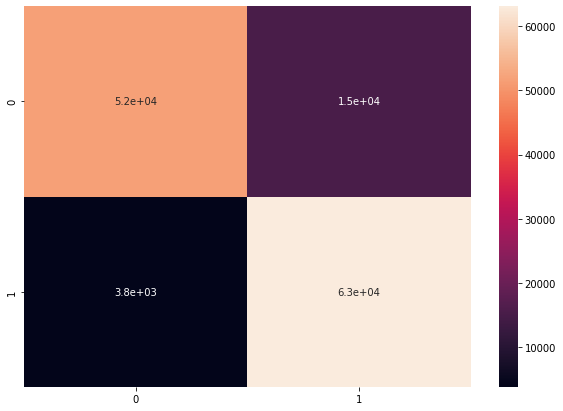

In [116]:
plt.figure(figsize=[10,7],)
sns.heatmap(cm, annot = True)
plt.show()

In [117]:
print(classification_report(y_test, y_pred_rf_c))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84     66746
           1       0.81      0.94      0.87     66916

    accuracy                           0.86    133662
   macro avg       0.87      0.86      0.86    133662
weighted avg       0.87      0.86      0.86    133662



In [118]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [119]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)

In [120]:
def grid_search(model,folds,params,scoring):
    grid_search = GridSearchCV(model,
                                cv=folds, 
                                param_grid=params, 
                                scoring=scoring, 
                                n_jobs=-1, verbose=1)
    return grid_search

In [121]:
def print_best_score_params(model):
    print("Best Score: ", model.best_score_)
    print("Best Hyperparameters: ", model.best_params_)

In [ ]:
log_reg = LogisticRegression()
log_params = {'C': [0.01, 1, 10], 
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear','newton-cg','saga']
         }
grid_search_log = grid_search(log_reg, folds, log_params, scoring=None)
grid_search_log.fit(X_train, y_train)
print_best_score_params(grid_search_log)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
dtc = DecisionTreeClassifier(random_state=40)
dtc_params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20,30]
}
grid_search_dtc = grid_search(dtc, folds, dtc_params, scoring='roc_auc_ovr')
grid_search_dtc.fit(X_train, y_train)
print_best_score_params(grid_search_dtc)

rfc = RandomForestClassifier(random_state=40, n_jobs = -1,oob_score=True)
rfc_params = {'max_depth': [10,20,30,40],
          'min_samples_leaf': [5,10,15,20,30],
          'n_estimators': [100,200,500,700]
        }
grid_search_rfc = grid_search(rfc, folds, rfc_params, scoring='roc_auc_ovr')
grid_search_rfc.fit(X_train, y_train)
print('OOB SCORE :',grid_search_rfc.best_estimator_.oob_score_)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)